<a href="https://colab.research.google.com/github/Ksh-mann/Python_DataAnalysis/blob/main/Py_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import io

In [29]:
from google.colab import files
uploaded = files.upload()

Saving tips.csv to tips.csv


In [30]:
df = pd.read_csv(io.BytesIO(uploaded['tips.csv']))
print(df)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [31]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [32]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# **Common Data Visualizations**

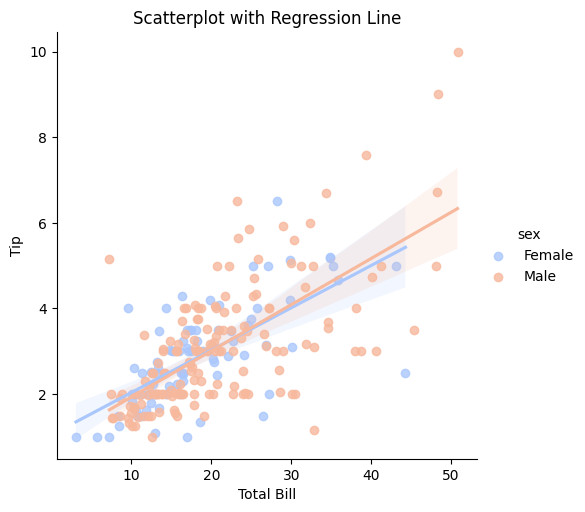

In [33]:
#Visualization 1: Scatterplot
sns.lmplot(x='total_bill', y='tip', data=df, hue='sex', palette='coolwarm')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Scatterplot with Regression Line')
plt.show()

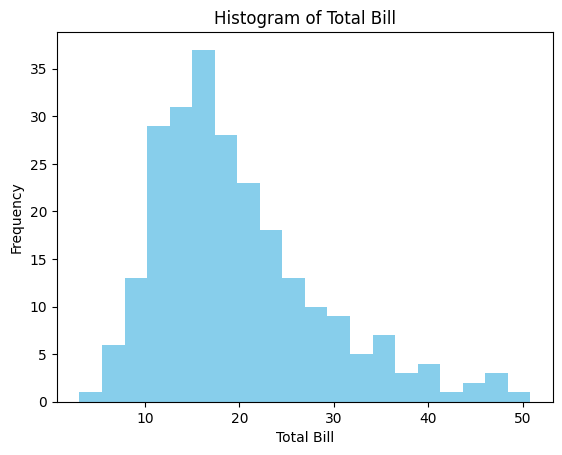

In [34]:
# Visualization 2: Histogram
plt.hist(df['total_bill'], bins=20, color='skyblue')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.title('Histogram of Total Bill')
plt.show()

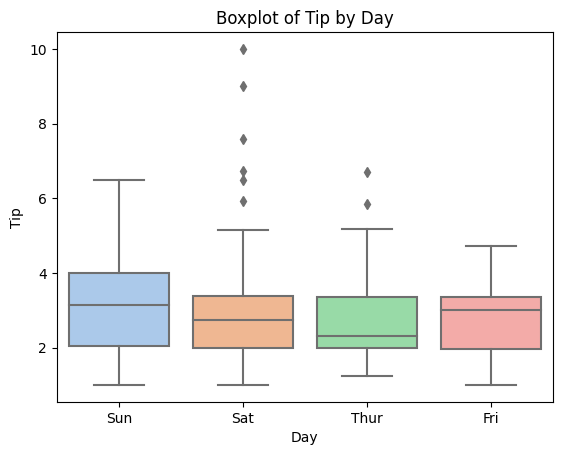

In [35]:
#Visualization 3: Boxplot (Tip x Day)
sns.boxplot(x='day', y='tip', data=df, palette='pastel')
plt.xlabel('Day')
plt.ylabel('Tip')
plt.title('Boxplot of Tip by Day')
plt.show()

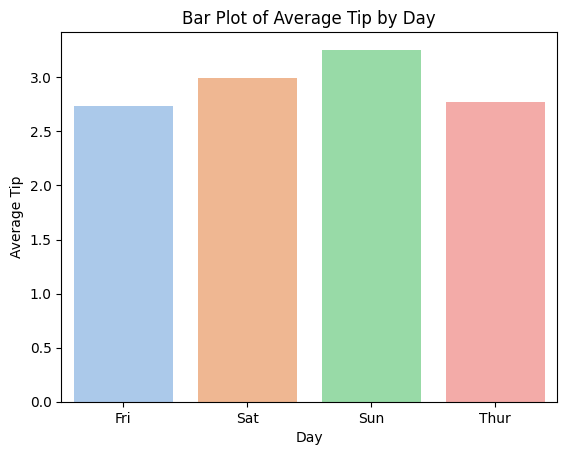

In [36]:
#Visualization 4: Bar Plot
average_tip_by_day = df.groupby('day')['tip'].mean().reset_index()
sns.barplot(x='day', y='tip', data=average_tip_by_day, palette='pastel')
plt.xlabel('Day')
plt.ylabel('Average Tip')
plt.title('Bar Plot of Average Tip by Day')
plt.show()

<ipython-input-38-125fd4d88677>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


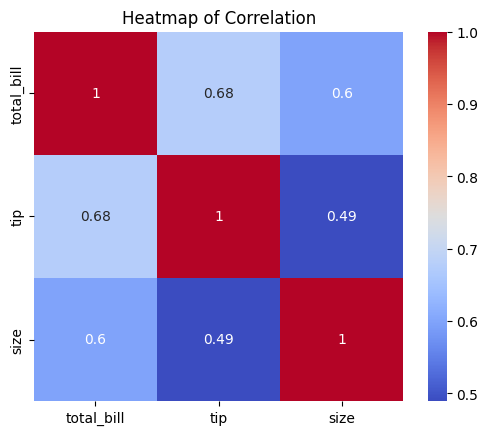

In [38]:
# Visualization 5: Heatmap of Correlation
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Heatmap of Correlation')
plt.show()

# **Feature Implementation**

In [68]:
# Feature 1: Tip Percentage
df['tip_percentage'] = (df['tip'] / df['total_bill']) * 100

# Feature 2: Total Bill Per Person
df['total_bill_per_person'] = df['total_bill'] / (df['size'])

# Display updated dataset with added features
print(df.head())


   total_bill   tip     sex smoker  day    time  size  tip_percentage  \
0       16.99  1.01  Female     No  Sun  Dinner     2        5.944673   
1       10.34  1.66    Male     No  Sun  Dinner     3       16.054159   
2       21.01  3.50    Male     No  Sun  Dinner     3       16.658734   
3       23.68  3.31    Male     No  Sun  Dinner     2       13.978041   
4       24.59  3.61  Female     No  Sun  Dinner     4       14.680765   

   total_bill_per_person  
0               8.495000  
1               3.446667  
2               7.003333  
3              11.840000  
4               6.147500  


# **Predictive Analysis using Linear Regression**

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
# Preprocessing: Convert categorical variables into numerical form
pdf = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'])

# Split the data into features (X) and target variable (y)
X = pdf.drop('tip', axis=1)
y = pdf['tip']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
pdf.head()

,total_bill,tip,size,tip_percentage,total_bill_per_person,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,2,5.944673,8.495000,1,0,1,0,0,0,1,0,1,0
1,10.34,1.66,3,16.054159,3.446667,0,1,1,0,0,0,1,0,1,0
2,21.01,3.50,3,16.658734,7.003333,0,1,1,0,0,0,1,0,1,0
3,23.68,3.31,2,13.978041,11.840000,0,1,1,0,0,0,1,0,1,0
4,24.59,3.61,4,14.680765,6.147500,1,0,1,0,0,0,1,0,1,0


In [65]:
#Building the Predictive Model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Predict tip amount using the test data
y_pred = model.predict(X_test)

In [67]:
# Calculate the mean squared error and R-squared score to evaluate performance of model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared Score: {r2:.2f}')

Mean Squared Error: 0.23
R-squared Score: 0.82
